<a href="https://colab.research.google.com/github/introvet7/CHMP/blob/main/%D0%A7%D0%9C%D0%9F_13_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Лабораторна робота 13.
#Кияшко Ілля Олегович
ФІТ 2-8

Варінт 8


#Метод Ейлера

x = [0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8] 
y = [1.4    1.5349 1.6715 1.8094 1.9482 2.0874 2.2268 2.3665 2.5062 2.6462
 2.7866]


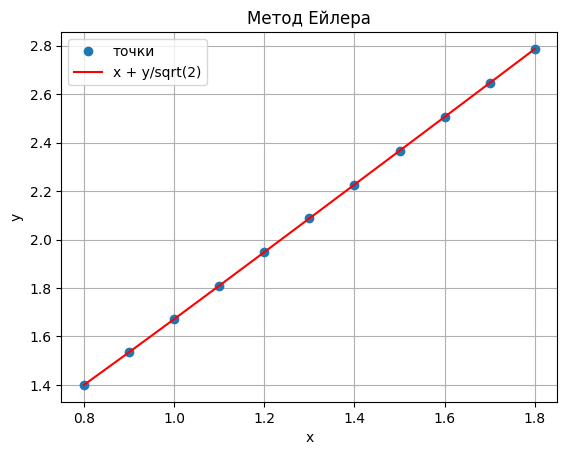

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.cos(y/np.sqrt(2))

# Вводимо параметри (ліва, права межі відрізку, крок, початкова умова)
a, b, h, y0 = 0.8, 1.8, 0.1, 1.4

# Перевірка вхідних параметрів
if h <= 0:
    print("Крок h повинен бути позитивним.")
    exit()
if a >= b:
    print("Права межа b повинна бути більшою за ліву межу a.")
    exit()

n = int((b - a) / h) # кількість кроків

x = np.array([a + i*h for i in range(n + 1)]) # задаємо x генератором списків

y = np.empty(n + 1)
y[0] = y0

for i in range(n):
    y[i + 1] = y[i] + f(x[i], y[i]) * h

y_rounded = np.round_(y, 4)
print("x =", x, "\ny =", y_rounded)

plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера")
plt.legend(["точки", "x + y/sqrt(2)"])
plt.grid()
plt.show()

#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
y= [1.4        1.4581711  1.52261894 1.59287018 1.66846259 1.74895034
 1.83390983 1.92294572 2.01569641 2.11183938 2.21109562 2.31323348]


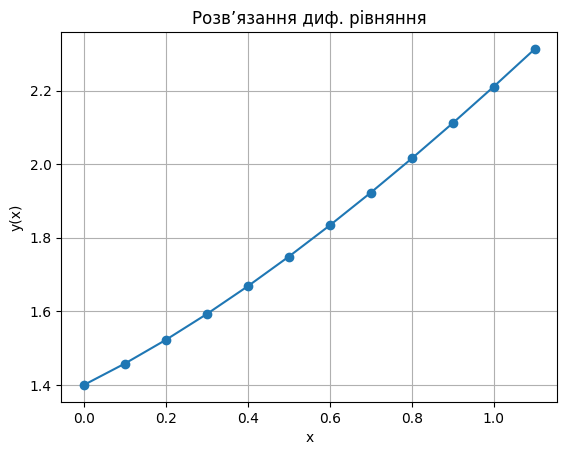

In [20]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.cos(y/np.sqrt(2))

# Початкова умова
y0 = 1.4

# Значення x
x = np.array([i * 0.1 for i in range(0, 12)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
y= [1.4        1.4526163  1.51045643 1.57315977 1.64037169 1.71175558
 1.78699319 1.86578457 1.94784814 2.03292066 2.12075722 2.21113127]


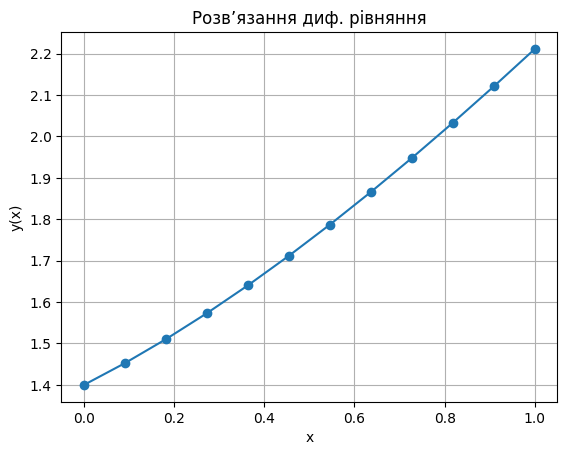

In [24]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.cos(y/np.sqrt(2))

# Початкова умова
y0 = [1.4]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 12)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Метод Ейлера-Коші

x = [1.7 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7] 
y = [5.3    5.5736 5.8555 6.1447 6.4405 6.7418 7.0479 7.3579 7.6709 7.9864
 8.3035]


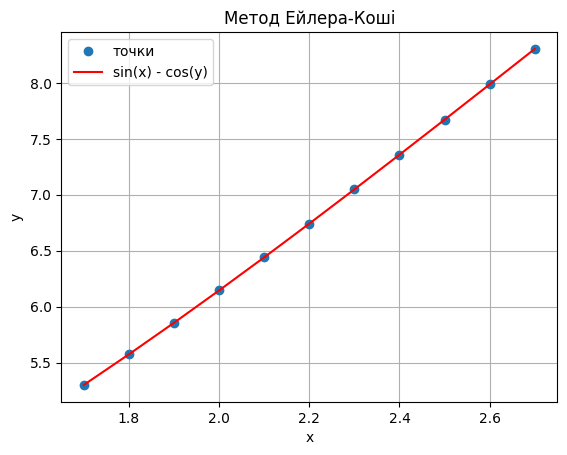

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(x, y):
    return x + np.sin(y / np.pi)

a = 1.7  # ліва межа відрізку
b = 2.7  # права межа відрізку
h = 0.1  # крок
y0 = 5.3  # початкова умова
n = int((b - a) / h)  # кількість кроків

# Генерація x
x = np.linspace(a, b, n + 1)  # Задати x з включенням b

y = np.empty(n + 1)
y[0] = y0

# Метод Ейлера-Коші
for i in range(n):
    # Використовується середнє значення для нахилу
    y[i + 1] = y[i] + (f(x[i], y[i]) + f(x[i + 1], y[i] + h * f(x[i], y[i]))) * h / 2

y_rounded = np.round_(y, 4)

print("x =", x, "\ny =", y_rounded)

# Візуалізація
plt.plot(x, y, "o", x, y, "red")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Метод Ейлера-Коші")
plt.legend(["точки", "sin(x) - cos(y)"])
plt.grid()
plt.show()


#Розв’язок диф. Рівняння за допомогою scipy.integrate import odeint

x= [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1]
y= [5.3        5.40411808 5.51771779 5.64062044 5.77261641 5.91346503
 6.06289467 6.22060357 6.38626148 6.55951231 6.73997724 6.92725878]


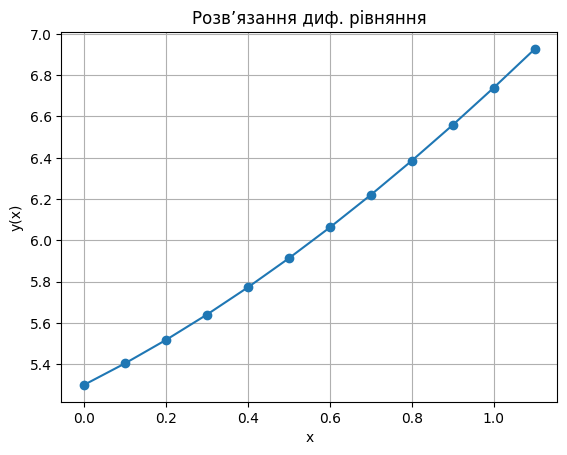

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(y, x):
    return x + np.sin(y / np.pi)

# Початкова умова
y0 = 5.3

# Значення x
x = np.array([i * 0.1 for i in range(0, 12)])

# Розв'язання ODE
y = odeint(model, y0, x)

# Виведення результатів
print('x=', x)
print('y=', y.flatten())  # Перетворення в одновимірний масив для виводу

# Побудова графіка результатів
plt.plot(x, y, marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()


#Використання scipy.integrate.solve_ivp
Функція solve_ivp є більш сучасним і гнучким способом розв'язання ODE, ніж odeint. Вона також дозволяє використовувати різні методи інтегрування.

x= [0.         0.09090909 0.18181818 0.27272727 0.36363636 0.45454545
 0.54545455 0.63636364 0.72727273 0.81818182 0.90909091 1.        ]
y= [5.3        5.39425856 5.4963663  5.60619384 5.72358593 5.84836713
 5.98034275 6.11929887 6.26500235 6.4172008  6.57562262 6.73997694]


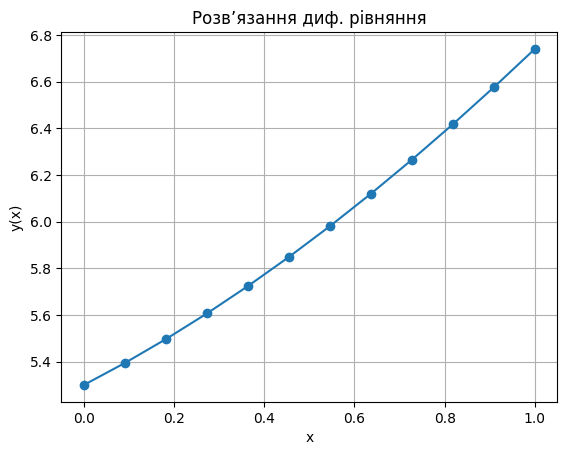

In [23]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Функція, що повертає dy/dx
def model(x, y):
    return x + np.sin(y / np.pi)

# Початкова умова
y0 = [5.3]  # Потрібно передати як список

# Значення x
x = np.linspace(0, 1, 12)

# Розв'язання ODE
sol = solve_ivp(model, [0, 1], y0, t_eval=x)

# Виведення результатів
print('x=', sol.t)
print('y=', sol.y[0])

# Побудова графіка результатів
plt.plot(sol.t, sol.y[0], marker='o')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title('Розв’язання диф. рівняння')
plt.grid()
plt.show()
